- https://www.youtube.com/watch?v=9BPCV5TYPmg
- https://github.com/Coding-Crashkurse/LangGraph-Tutorial/blob/main/human_in_loop.ipynb


In [49]:
from dotenv import load_dotenv

load_dotenv()

True

In [50]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]

In [51]:
import os
from langchain_openai import AzureChatOpenAI

def Get_LLM():    
    os.environ["AZURE_OPENAI_API_KEY"] = '352a6bee97b5451ab5866993a7ef4ce4'
    os.environ["AZURE_OPENAI_ENDPOINT"] = 'https://aoai-spn-krc.openai.azure.com/'
    model = AzureChatOpenAI(  
      api_version = '2024-02-01',
      azure_deployment = 'gpt-4o-kr-spn',
      temperature = 0.0
    )
    return model

In [52]:
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults
from typing_extensions import TypedDict

from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

memory = SqliteSaver.from_conn_string(":memory:")


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

# set up API key
os.environ["TAVILY_API_KEY"] = "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"
tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = Get_LLM()
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [53]:
graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

In [54]:
graph = graph_builder.compile(
    checkpointer=memory,
    interrupt_before=["tools"],
)

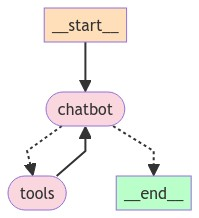

In [55]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [56]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="Hello, I am John")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hello, I am John', id='7d1f2c9e-7095-48c5-87a9-372e5bf1eb3b'),
  AIMessage(content='Hi John! How can I assist you today?', response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 84, 'total_tokens': 95}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_abc28019ad', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='run-bf4839f9-5930-4282-9d8f-713093f897d9-0', usage_metadata={'input_tokens': 84, 'output_tokens': 1

In [57]:
config = {"configurable": {"thread_id": "100"}}
input_message = HumanMessage(content="Sorry, did I already introduce myself?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Sorry, did I already introduce myself?', id='dc74ccc8-04d3-4db3-8da2-d80c77cd6fab'),
  AIMessage(content="No, you haven't introduced yourself yet. How can I assist you today?", response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 87, 'total_tokens': 103}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_abc28019ad', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='run-9fc00740-09e9-46a7-ae1e-3f4e380b8175-0',

In [58]:
config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="Sorry, did I already introduce myself?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hello, I am John', id='7d1f2c9e-7095-48c5-87a9-372e5bf1eb3b'),
  AIMessage(content='Hi John! How can I assist you today?', response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 84, 'total_tokens': 95}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_abc28019ad', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='run-bf4839f9-5930-4282-9d8f-713093f897d9-0', usage_metadata={'input_tokens': 84, 'output_tokens': 1

In [59]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="How is the weather in Los Angeles?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hello, I am John', id='7d1f2c9e-7095-48c5-87a9-372e5bf1eb3b'),
  AIMessage(content='Hi John! How can I assist you today?', response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 84, 'total_tokens': 95}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_abc28019ad', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='run-bf4839f9-5930-4282-9d8f-713093f897d9-0', usage_metadata={'input_tokens': 84, 'output_tokens': 1

In [60]:
snapshot = graph.get_state(config)
snapshot.next

('tools',)

In [61]:
graph.invoke(None, config=config)

{'messages': [HumanMessage(content='Hello, I am John', id='7d1f2c9e-7095-48c5-87a9-372e5bf1eb3b'),
  AIMessage(content='Hi John! How can I assist you today?', response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 84, 'total_tokens': 95}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_abc28019ad', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='run-bf4839f9-5930-4282-9d8f-713093f897d9-0', usage_metadata={'input_tokens': 84, 'output_tokens': 1

In [62]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "2"}}
input_message = HumanMessage(content="How is the weather in Los Angeles?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='How is the weather in Los Angeles?', id='38e92e1d-0b8e-451e-a559-1bb9462114fc'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_oPuwPGySpzuXpL2NMRP9lEOo', 'function': {'arguments': '{"query":"current weather in Los Angeles"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 87, 'total_tokens': 109}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_abc28019ad', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='run-50bb7f3f-808d-46fd-94d0-011f200637d0-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'q

In [63]:
snapshot = graph.get_state(config)
existing_message = snapshot.values["messages"][-1]
existing_message.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_oPuwPGySpzuXpL2NMRP9lEOo)
 Call ID: call_oPuwPGySpzuXpL2NMRP9lEOo
  Args:
    query: current weather in Los Angeles


In [64]:
from langchain_core.messages import AIMessage, ToolMessage

answer = "It is only 5°C warm today!"
new_messages = [
    ToolMessage(content=answer, tool_call_id=existing_message.tool_calls[0]["id"]),
    AIMessage(content=answer),
]

In [65]:
new_messages[-1].pretty_print()
graph.update_state(
    config,
    {"messages": new_messages},
)

print("\n\nLast 2 messages;")
print(graph.get_state(config).values["messages"][-2:])

================================== Ai Message ==================================

It is only 5°C warm today!


Last 2 messages;
[ToolMessage(content='It is only 5°C warm today!', id='c5c8f4ef-c505-4638-9487-f3bf3f8578dd', tool_call_id='call_oPuwPGySpzuXpL2NMRP9lEOo'), AIMessage(content='It is only 5°C warm today!', id='fa8e8bb4-7ac2-4a86-ad6b-cfb86f298b29')]


In [66]:
config = {"configurable": {"thread_id": "2"}}
input_message = HumanMessage(content="How warm was it again?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='How is the weather in Los Angeles?', id='38e92e1d-0b8e-451e-a559-1bb9462114fc'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_oPuwPGySpzuXpL2NMRP9lEOo', 'function': {'arguments': '{"query":"current weather in Los Angeles"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 87, 'total_tokens': 109}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_abc28019ad', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='run-50bb7f3f-808d-46fd-94d0-011f200637d0-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'q

Custom State

In [67]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from typing_extensions import TypedDict

from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]
    ask_human: bool

대화를 전문가에게 에스컬레이션하세요. 직접적으로 도움을 줄 수 없거나 사용자에게 권한 이상의 지원이 필요한 경우 이 방법을 사용하세요.

이 기능을 사용하려면 전문가가 올바른 안내를 제공할 수 있도록 사용자의 '요청'을 전달해야 합니다.

In [68]:
from langchain_core.tools import tool


@tool
def request_assistance():
    """Escalate the conversation to an expert. Use this if you are unable to assist directly or if the user requires support beyond your permissions.

    To use this function, relay the user's 'request' so the expert can provide the right guidance.
    """
    return ""

In [69]:
tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = Get_LLM()
llm_with_tools = llm.bind_tools(tools + [request_assistance])


def chatbot(state: State):
    response = llm_with_tools.invoke(state["messages"])
    ask_human = False
    if response.tool_calls and response.tool_calls[0]["name"] == "request_assistance":
        ask_human = True
    return {"messages": [response], "ask_human": ask_human}

In [70]:
graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=[tool]))

In [71]:
from langchain_core.messages import AIMessage, ToolMessage


def create_response(response: str, ai_message: AIMessage):
    return ToolMessage(
        content=response,
        tool_call_id=ai_message.tool_calls[0]["id"],
    )


def human_node(state: State):
    new_messages = []
    if not isinstance(state["messages"][-1], ToolMessage):
        new_messages.append(
            create_response("No response from human.", state["messages"][-1])
        )
    return {
        "messages": new_messages,
        "ask_human": False,
    }


graph_builder.add_node("human", human_node)

In [72]:
def select_next_node(state: State):
    if state["ask_human"]:
        return "human"
    return tools_condition(state)


graph_builder.add_conditional_edges(
    "chatbot",
    select_next_node,
    {"human": "human", "tools": "tools", "__end__": "__end__"},
)

In [73]:
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge("human", "chatbot")
graph_builder.set_entry_point("chatbot")
memory = SqliteSaver.from_conn_string(":memory:")
graph = graph_builder.compile(
    checkpointer=memory,
    interrupt_before=["human"],
)

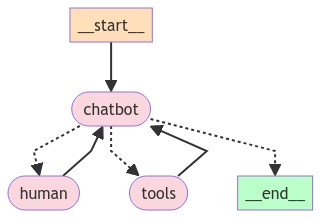

In [74]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [75]:
config = {"configurable": {"thread_id": "42"}}
input_message = HumanMessage(
    content="I need some expert advice on how to plan a trip to barcelona"
)

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='I need some expert advice on how to plan a trip to barcelona', id='2b49f1ed-d47f-43a9-8aca-5cb2257afc0d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_S31bvrn71gO31kuxKXemb91w', 'function': {'arguments': '{}', 'name': 'request_assistance'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 150, 'total_tokens': 161}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_abc28019ad', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='run-973416ee-a84e-4ae5-b098-8b6dea8a2fb1-0', tool_calls=[{'name': 'request_assistance', 'args': {}, 'id': 'call_S31bvrn71gO31kux

In [76]:
snapshot = graph.get_state(config)
snapshot.next

('human',)

In [77]:
ai_message = snapshot.values["messages"][-1]
human_response = "Sure here is the best hotel: hotelxyz, and the best flight: flightxyz"
tool_message = create_response(human_response, ai_message)
graph.update_state(config, {"messages": [tool_message]})

{'configurable': {'thread_id': '42',
  'thread_ts': '1ef3db4f-eacf-6b5b-8002-deccac3075f2'}}

In [78]:
graph.invoke(None, config=config)

{'messages': [HumanMessage(content='I need some expert advice on how to plan a trip to barcelona', id='2b49f1ed-d47f-43a9-8aca-5cb2257afc0d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_S31bvrn71gO31kuxKXemb91w', 'function': {'arguments': '{}', 'name': 'request_assistance'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 150, 'total_tokens': 161}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_abc28019ad', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='run-973416ee-a84e-4ae5-b098-8b6dea8a2fb1-0', tool_calls=[{'name': 'request_assistance', 'args': {}, 'id': 'call_S31bvrn71gO31kux